In [1]:
! pip install kaggle
! mkdir ~/.kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [3]:
# https://www.kaggle.com/datasets/parisrohan/credit-score-classification
! kaggle datasets download parisrohan/credit-score-classification

credit-score-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [1]:
! unzip credit-score-classification.zip

unzip:  cannot find or open credit-score-classification.zip, credit-score-classification.zip.zip or credit-score-classification.zip.ZIP.


In [151]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random
import time

%matplotlib inline

In [3]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [313]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline, Pipeline

# DataSet Loading







In [154]:
data = pd.read_csv('/content/drive/MyDrive/DataSets/CreditScore/train.csv')
data.describe()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [155]:
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [156]:
data.shape

(100000, 28)

In [157]:
data.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


# Data Handling

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [159]:
pd.set_option('display.max_columns', None)
data.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [160]:
data.groupby('Customer_ID').Annual_Income.value_counts()

Customer_ID  Annual_Income     
CUS_0x1000   30625.94              7
             30625.94_             1
CUS_0x1009   52312.68              7
             52312.68_             1
CUS_0x100b   113781.38999999998    8
                                  ..
CUS_0xff4    25546.26_             1
CUS_0xff6    117639.92             8
CUS_0xffc    60877.17              8
CUS_0xffd    41398.44              7
             41398.44_             1
Name: Annual_Income, Length: 18955, dtype: int64

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [162]:
col_with_nulls = []
for column in data.columns:
  if data[column].isnull().sum() != 0:
    col_with_nulls.append(column)
col_with_nulls


['Name',
 'Monthly_Inhand_Salary',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [163]:
df_copy = data.copy()

In [164]:
df_copy = df_copy.drop(['Name','SSN'], axis=1)


In [165]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Age                       100000 non-null  object 
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  object 
 6   Monthly_Inhand_Salary     84998 non-null   float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  object 
 11  Type_of_Loan              88592 non-null   object 
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    92998 non-null   ob

In [166]:
mode_age = df_copy.groupby(['Customer_ID'])['Age'].apply(pd.Series.mode)

In [167]:
mode_age.min()

'-500'



> Очищаем данные



In [168]:
import re

In [169]:
col_to_clean = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'   
]

In [170]:
df_copy1 = df_copy.copy()

In [171]:
for col in col_to_clean:
    df_copy1[col].apply(lambda x: re.sub(r'[_*]', '', str(x)))
    df_copy1[col] = pd.to_numeric(df_copy1[col], errors='coerce')

In [172]:
df_copy1[col_to_clean].dtypes

Age                        float64
Annual_Income              float64
Num_of_Loan                float64
Num_of_Delayed_Payment     float64
Changed_Credit_Limit       float64
Outstanding_Debt           float64
Amount_invested_monthly    float64
Monthly_Balance            float64
dtype: object

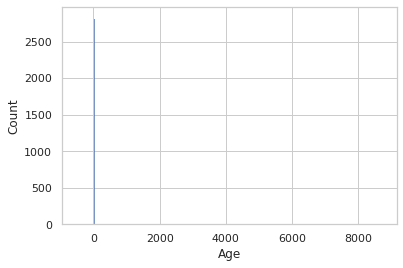

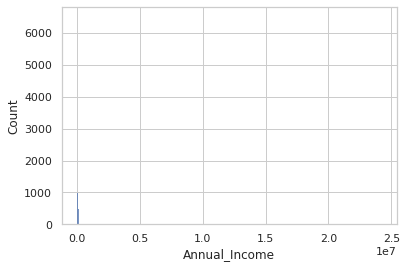

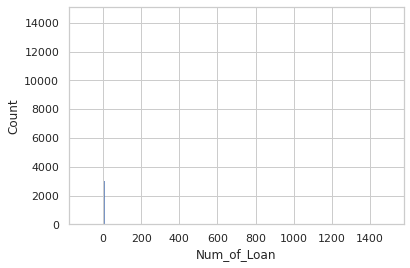

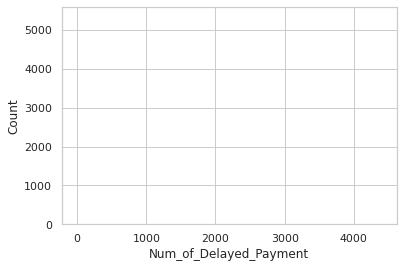

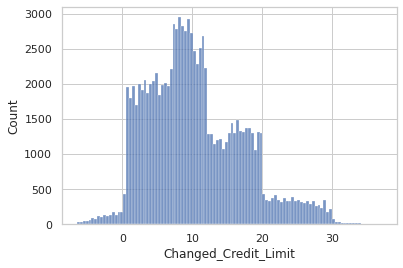

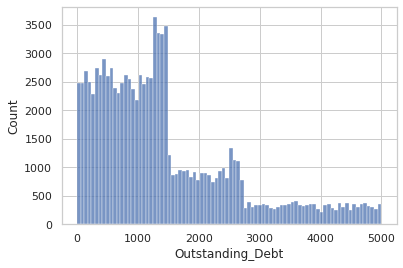

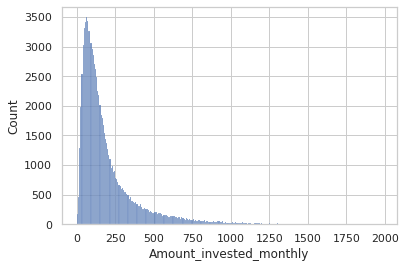

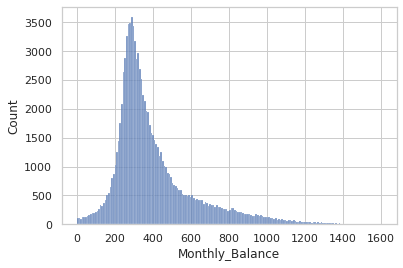

In [173]:
for col in col_to_clean:
    sns.histplot(df_copy1[col])
    plt.show()

In [174]:
df_copy1[col_to_clean].describe()

,Age,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
count,95061.000000,9.302000e+04,95215.000000,90254.000000,97909.000000,98991.000000,91216.000000,98791.000000
mean,110.934505,1.785790e+05,2.780339,31.033051,10.389025,1426.503700,195.539456,402.551258
std,689.407864,1.442878e+06,62.500940,226.955758,6.789496,1155.045753,199.564527,213.925499
min,-500.000000,7.005930e+03,-100.000000,-3.000000,-6.490000,0.230000,0.000000,0.007760
25%,24.000000,1.943560e+04,1.000000,9.000000,5.320000,566.080000,72.236692,270.106630
50%,33.000000,3.755074e+04,3.000000,14.000000,9.400000,1166.370000,128.954538,336.731225
75%,42.000000,7.284338e+04,5.000000,18.000000,14.870000,1948.200000,236.815814,470.262938
max,8698.000000,2.419806e+07,1496.000000,4397.000000,36.970000,4998.070000,1977.326102,1602.040519


In [175]:
df_copy1[col_to_clean].head()

,Age,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
0,23.0,19114.12,4.0,7.0,11.27,809.98,80.415295,312.494089
1,23.0,19114.12,4.0,NaN,11.27,809.98,118.280222,284.629162
2,-500.0,19114.12,4.0,7.0,NaN,809.98,81.699521,331.209863
3,23.0,19114.12,4.0,4.0,6.27,809.98,199.458074,223.451310
4,23.0,19114.12,4.0,NaN,11.27,809.98,41.420153,341.489231


In [176]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Age                       100000 non-null  object 
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  object 
 6   Monthly_Inhand_Salary     84998 non-null   float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  object 
 11  Type_of_Loan              88592 non-null   object 
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    92998 non-null   ob

In [177]:
extra_num_features = [
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Delay_from_due_date',
    'Num_Credit_Inquiries',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month'
]

In [178]:
df_copy1[extra_num_features].describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [179]:
df_copy1[extra_num_features].iloc[:, 7].isnull().sum()

0

In [180]:
df_copy1[extra_num_features].iloc[:, 7]

0        49.574949
1        49.574949
2        49.574949
3        49.574949
4        49.574949
           ...    
99995    35.104023
99996    35.104023
99997    35.104023
99998    35.104023
99999    35.104023
Name: Total_EMI_per_month, Length: 100000, dtype: float64

In [181]:
df_copy1['Age'][(df_copy1['Age'] < 0) | (df_copy1['Age'] >= 100)]

2        -500.0
56       7580.0
113      -500.0
122       181.0
219       995.0
          ...  
99913    2263.0
99937    -500.0
99950    1342.0
99963    -500.0
99972    1753.0
Name: Age, Length: 2692, dtype: float64



> Подготовка категориальных признаков



In [182]:
# without of 'Payment_Behaviour'
cat_features = [
    'Occupation',
    'Type_of_Loan',
    'Credit_Mix',
    'Payment_of_Min_Amount',
]



*   Occupation



In [183]:
df_copy1.Occupation.value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [184]:
df_copy1.Occupation[8]

'_______'

In [185]:
df_copy1.Occupation = df_copy1.Occupation.replace('_______', np.NaN)

In [186]:
df_copy1.Occupation.isnull().sum()

7062



*   Type_of_Loan




In [187]:
df_copy1.Type_of_Loan[0]

'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'

In [188]:
df_copy1.Type_of_Loan = df_copy1.Type_of_Loan.apply(lambda x: re.sub(r'(, )', ',', str(x)))

In [189]:
df_copy1.Type_of_Loan = df_copy1.Type_of_Loan.apply(lambda x: re.sub(r'(and )', '', str(x)))

In [190]:
df_copy1.Type_of_Loan = df_copy1.Type_of_Loan.str.split(',')

In [191]:
df_copy1.Type_of_Loan

0        [Auto Loan, Credit-Builder Loan, Personal Loan...
1        [Auto Loan, Credit-Builder Loan, Personal Loan...
2        [Auto Loan, Credit-Builder Loan, Personal Loan...
3        [Auto Loan, Credit-Builder Loan, Personal Loan...
4        [Auto Loan, Credit-Builder Loan, Personal Loan...
                               ...                        
99995                            [Auto Loan, Student Loan]
99996                            [Auto Loan, Student Loan]
99997                            [Auto Loan, Student Loan]
99998                            [Auto Loan, Student Loan]
99999                            [Auto Loan, Student Loan]
Name: Type_of_Loan, Length: 100000, dtype: object



*   Credit_Mix




In [192]:
df_copy1.Credit_Mix.value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [193]:
df_copy1.Credit_Mix.head(10)

0       _
1    Good
2    Good
3    Good
4    Good
5    Good
6    Good
7    Good
8    Good
9    Good
Name: Credit_Mix, dtype: object

In [194]:
df_copy1.Credit_Mix = df_copy1.Credit_Mix.replace('_', np.NaN)

In [195]:
df_copy1.groupby('Customer_ID').Credit_Mix.agg(pd.Series.mode).value_counts()

Standard    5731
Good        3798
Bad         2971
Name: Credit_Mix, dtype: int64



*   Payment_of_Min_Amount








In [196]:
df_copy1.Payment_of_Min_Amount.tail(10)

99990    Yes
99991    Yes
99992     No
99993     No
99994     No
99995     No
99996     No
99997     No
99998     No
99999     No
Name: Payment_of_Min_Amount, dtype: object

In [197]:
df_copy1.Payment_of_Min_Amount.value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [198]:
df_copy1.Payment_of_Min_Amount.isnull().sum()

0

In [199]:
# df_copy1.groupby('Customer_ID').Payment_of_Min_Amount.agg(pd.Series.mode).value_counts()

In [200]:
# изменений не требуется

In [201]:
# Получение признака Credit_History_Age

# cred_hist_age = df_copy1['Credit_History_Age'].apply(lambda x: (re.sub(r' Years and ', '.', str(x))))
# cred_hist_age = cred_hist_age.apply(lambda x:(re.sub(r' Months', '', str(x))))
# cred_hist_age[cred_hist_age != 'nan'] = cred_hist_age[cred_hist_age != 'nan'].apply(lambda x: int(x[0: x.index('.')])*12 + int(x[x.index('.') + 1: len(x)]))
# cred_hist_age = pd.to_numeric(cred_hist_age, errors='coerce')
# df_copy1['Credit_History_Age'] = cred_hist_age

# tmp = df_copy1.groupby('Customer_ID')['Credit_History_Age'].tail(7)
# index_nan = list(filter(lambda x: x != 0, np.array(tmp.index * tmp.isna())))

# for i in index_nan:
    
#     df_copy1['Credit_History_Age'][i] = df_copy1['Credit_History_Age'][i - 1] + 1.0

# cred_hist_age = df_copy1.groupby('Customer_ID')['Credit_History_Age'].tail(1)




> Cred_hist_age



In [202]:
cred_hist_age = df_copy1['Credit_History_Age'].apply(lambda x: (re.sub(r' Years and ', '.', str(x))))

In [203]:
cred_hist_age = cred_hist_age.apply(lambda x:(re.sub(r' Months', '', str(x))))

In [204]:
cred_hist_age[cred_hist_age != 'nan'] = cred_hist_age[cred_hist_age != 'nan'].apply(lambda x: int(x[0: x.index('.')])*12 + int(x[x.index('.') + 1: len(x)]))

In [205]:
# cred_hist_age[cred_hist_age != 'nan'] = cred_hist_age[cred_hist_age != 'nan'].apply(lambda x: round(float(x[0: x.index('.')]) + (int(x[x.index('.') + 1: len(x)]) / 12),2))

In [206]:
cred_hist_age = pd.to_numeric(cred_hist_age, errors='coerce')

In [207]:
df_copy1['Credit_History_Age'] = cred_hist_age

In [208]:
tmp = df_copy1.groupby('Customer_ID')['Credit_History_Age'].tail(7)

In [209]:
index_nan = list(filter(lambda x: x != 0, np.array(tmp.index * tmp.isna())))

In [210]:
for i in index_nan:

    df_copy1['Credit_History_Age'][i] = df_copy1['Credit_History_Age'][i - 1] + 1.0

<ipython-input-210-b3a8f85cf89b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy1['Credit_History_Age'][i] = df_copy1['Credit_History_Age'][i - 1] + 1.0


In [211]:
cred_hist_age = df_copy1.groupby('Customer_ID')['Credit_History_Age'].tail(1)

In [212]:
cred_hist_age.reset_index(drop=True,inplace=True)

In [213]:
cred_hist_age.isnull().sum()

0

# Features Extraction



> Аггрегируем данные по каждому признаку, на основе статистик



In [214]:
df_agg = pd.DataFrame()

In [215]:
customer_id = df_copy1.groupby('Customer_ID')['Customer_ID'].agg(pd.Series.mode)

In [216]:
customer_id.reset_index(drop=True, inplace=True)

In [217]:
df_agg[customer_id.name] = customer_id

In [218]:
df_agg[cred_hist_age.name] = cred_hist_age

In [219]:
df_agg.dtypes

Customer_ID            object
Credit_History_Age    float64
dtype: object

In [220]:
df_agg

,Customer_ID,Credit_History_Age
0,CUS_0x1000,272.0
1,CUS_0x1009,326.0
2,CUS_0x100b,220.0
3,CUS_0x1011,214.0
4,CUS_0x1013,375.0
...,...,...
12495,CUS_0xff3,344.0
12496,CUS_0xff4,260.0
12497,CUS_0xff6,364.0
12498,CUS_0xffc,75.0


In [221]:
max_for_feature = ['Num_of_Delayed_Payment']

mean_for_features = ['Annual_Income',
                     'Credit_Utilization_Ratio',
                     'Amount_invested_monthly',
                     'Monthly_Balance',
                     'Outstanding_Debt',
                     'Monthly_Inhand_Salary',
                     'Total_EMI_per_month'
                     ]

mode_for_features = cat_features + ['Credit_Score']

# median 
median_for_features = list(set(extra_num_features + col_to_clean) - set(mean_for_features))
# Age
# Now_of_Loan
# Changed_Credit_Limit
# Num_of_Delayed_Payment
# Delay_from_due_date
# Num_Bank_Accounts
# Num_Credit_Card
# Interest_Rate
# Num_Credit_Inquiries

In [222]:

for col in df_copy1.columns[3:]:

    if col in mode_for_features:

          agg_res = df_copy1.groupby('Customer_ID')[col].agg(pd.Series.mode)
          agg_res.reset_index(drop=True, inplace=True)
          df_agg[col + '_mode'] = agg_res

    if col in mean_for_features:

          agg_res = df_copy1.groupby('Customer_ID')[col].agg(pd.Series.mean)
          agg_res.reset_index(drop=True, inplace=True)
          df_agg[col + '_mean'] = agg_res

    if col in median_for_features:

          agg_res = df_copy1.groupby('Customer_ID')[col].agg(pd.Series.median)
          agg_res.reset_index(drop=True, inplace=True)
          df_agg[col + '_median'] = agg_res

    if col in max_for_feature:

        agg_res = df_copy1.groupby('Customer_ID')[col].agg(pd.Series.max)
        agg_res.reset_index(drop=True, inplace=True)
        df_agg[col + '_max'] = agg_res
    



In [223]:
df_agg.shape

(12500, 24)

In [224]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    12500 non-null  object 
 1   Credit_History_Age             12500 non-null  float64
 2   Age_median                     12500 non-null  float64
 3   Occupation_mode                12500 non-null  object 
 4   Annual_Income_mean             12500 non-null  float64
 5   Monthly_Inhand_Salary_mean     12500 non-null  float64
 6   Num_Bank_Accounts_median       12500 non-null  float64
 7   Num_Credit_Card_median         12500 non-null  float64
 8   Interest_Rate_median           12500 non-null  float64
 9   Num_of_Loan_median             12500 non-null  float64
 10  Type_of_Loan_mode              12500 non-null  object 
 11  Delay_from_due_date_median     12500 non-null  float64
 12  Num_of_Delayed_Payment_median  12500 non-null 

In [225]:
df_agg.head(10)

,Customer_ID,Credit_History_Age,Age_median,Occupation_mode,Annual_Income_mean,Monthly_Inhand_Salary_mean,Num_Bank_Accounts_median,Num_Credit_Card_median,Interest_Rate_median,Num_of_Loan_median,Type_of_Loan_mode,Delay_from_due_date_median,Num_of_Delayed_Payment_median,Num_of_Delayed_Payment_max,Changed_Credit_Limit_median,Num_Credit_Inquiries_median,Credit_Mix_mode,Outstanding_Debt_mean,Credit_Utilization_Ratio_mean,Payment_of_Min_Amount_mode,Total_EMI_per_month_mean,Amount_invested_monthly_mean,Monthly_Balance_mean,Credit_Score_mode
0,CUS_0x1000,272.0,17.0,Lawyer,3.062594e+04,2706.161667,6.0,5.0,27.0,2.0,"[Credit-Builder Loan, Home Equity Loan]",62.0,25.0,28.0,1.63,11.0,Bad,1562.91,33.477546,Yes,42.941090,158.549735,335.375341,Poor
1,CUS_0x1009,326.0,26.0,Mechanic,5.231268e+04,4250.390000,6.0,5.0,17.0,4.0,"[Not Specified, Home Equity Loan, Credit-Build...",8.0,18.0,1749.0,9.73,3.0,Standard,202.68,29.839984,Yes,108.366467,146.679378,428.743155,Standard
2,CUS_0x100b,220.0,18.5,Media_Manager,1.137814e+05,9549.782500,1.0,4.0,1.0,0.0,[nan],14.0,7.0,9.0,11.34,1.0,Good,1030.20,34.841449,No,0.000000,505.386526,781.229776,Poor
3,CUS_0x1011,214.0,44.0,Doctor,5.891847e+04,5208.872500,3.0,3.0,17.0,3.0,"[Student Loan, Credit-Builder Loan, Debt Conso...",27.0,15.0,15.0,14.42,7.0,Standard,473.14,27.655897,Yes,123.434939,311.060914,332.642837,Standard
4,CUS_0x1013,375.0,44.0,Mechanic,9.862098e+04,7962.415000,3.0,3.0,6.0,3.0,"[Student Loan, Debt Consolidation Loan, Person...",12.0,9.0,9.0,1.33,3.0,Good,1233.51,31.933940,No,6266.765823,355.442408,472.781009,Standard
5,CUS_0x1015,390.0,27.0,Journalist,4.695102e+04,3725.585000,7.0,4.0,16.0,0.0,[nan],8.0,9.0,10.0,15.83,9.0,Standard,340.22,35.182883,Yes,0.000000,263.812274,398.217749,Good
6,CUS_0x1018,374.0,15.0,Accountant,2.193231e+06,5014.567500,7.0,7.0,23.0,8.0,"[Credit-Builder Loan, Payday Loan, Home Equity...",24.0,22.0,22.0,28.63,8.0,Bad,2773.09,28.293641,Yes,225.368691,225.456923,320.631135,Poor
7,CUS_0x1026,182.0,51.5,Manager,1.706143e+05,14463.856667,2.0,6.0,9.0,2.0,"[Payday Loan, Auto Loan]",0.0,2.0,5.0,0.73,3.0,Good,849.69,37.188278,No,208.907479,340.627976,1170.605581,Standard
8,CUS_0x102d,263.0,30.5,Entrepreneur,8.906452e+04,7256.043333,5.0,3.0,1.0,1.0,[Mortgage Loan],6.0,5.0,7.0,6.37,3.0,Good,648.36,33.927329,No,37.572751,384.920145,573.111438,Good
9,CUS_0x102e,324.0,26.0,Scientist,5.080744e+04,4197.953333,8.0,4.0,11.0,4.0,"[Mortgage Loan, Not Specified, Home Equity Loa...",12.0,10.0,10.0,2.60,4.0,Standard,869.59,34.275254,Yes,88.759919,112.067830,473.967584,Standard


In [226]:
df_agg.describe()

,Credit_History_Age,Age_median,Annual_Income_mean,Monthly_Inhand_Salary_mean,Num_Bank_Accounts_median,Num_Credit_Card_median,Interest_Rate_median,Num_of_Loan_median,Delay_from_due_date_median,Num_of_Delayed_Payment_median,Num_of_Delayed_Payment_max,Changed_Credit_Limit_median,Num_Credit_Inquiries_median,Outstanding_Debt_mean,Credit_Utilization_Ratio_mean,Total_EMI_per_month_mean,Amount_invested_monthly_mean,Monthly_Balance_mean
count,12500.000000,12500.000000,1.250000e+04,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000
mean,224.706880,33.312720,1.796078e+05,4198.468568,5.369600,5.534640,14.532080,3.532880,21.062520,13.318800,140.630880,10.396023,5.794600,1426.220376,32.285173,1403.118217,195.751837,403.120320
std,99.658262,10.765071,5.410269e+05,3187.142979,2.593078,2.066906,8.741636,2.446442,14.762367,6.191009,594.039625,6.510149,3.831752,1155.169458,2.060556,2914.621376,136.847120,175.476887
min,8.000000,14.000000,7.005930e+03,303.645417,-1.000000,0.500000,1.000000,0.000000,-2.000000,-1.500000,0.000000,-0.160000,0.000000,0.230000,25.476634,0.000000,14.528879,92.841401
25%,148.000000,24.000000,2.003669e+04,1625.744479,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,11.000000,5.500000,3.000000,566.072500,30.854492,41.104466,97.690749,284.546710
50%,222.000000,33.000000,4.040476e+04,3097.016667,5.000000,5.000000,13.000000,3.000000,18.000000,14.000000,16.000000,9.350000,5.000000,1166.155000,32.241830,105.291487,152.081485,338.491580
75%,305.000000,42.000000,8.218601e+04,5961.664375,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,21.000000,14.660000,8.500000,1945.962500,33.600168,369.930934,257.566585,465.372970
max,404.000000,56.000000,9.887193e+06,15204.633333,10.500000,11.000000,34.000000,9.000000,62.500000,26.500000,4397.000000,29.980000,17.000000,4998.070000,42.395301,29986.742104,1005.847285,1349.264887




> Dummy Encoding and MultiLable Encoding



In [227]:
from sklearn.preprocessing import MultiLabelBinarizer

In [228]:
mlb = MultiLabelBinarizer()

In [229]:
# Проверка пустых значений в Type_of_Loan

In [230]:

df_copy.Type_of_Loan.isnull().sum()

11408

In [231]:
r = df_copy.groupby('Customer_ID').Type_of_Loan.agg(pd.Series.mode)

In [232]:
r.apply(lambda x: True if len(x) < 2 else False).sum()

1426



> После аггрегации данных по признаку Type_of_Loan всё ещё остались пустые значения, поэтому было принято решение **удалить** строки с пустыми значенями



In [233]:
# df_agg['Type_of_Loan_mode'].replace(list('nan'), np.nan, inplace=True)

In [234]:
is_nan = df_agg['Type_of_Loan_mode'].apply(lambda x: True if str(x) == str(['nan']) else False)

In [235]:
is_nan

0        False
1        False
2         True
3        False
4        False
         ...  
12495    False
12496    False
12497    False
12498    False
12499    False
Name: Type_of_Loan_mode, Length: 12500, dtype: bool

In [236]:
df_agg[is_nan].index

Int64Index([    2,     5,    15,    23,    38,    39,    52,    53,    58,
               67,
            ...
            12352, 12362, 12370, 12383, 12392, 12394, 12409, 12464, 12481,
            12493],
           dtype='int64', length=1426)

In [237]:
df_agg.drop(df_agg[is_nan].index, inplace=True)



> Преобразование категориальных признаков в числовые



In [238]:
df_agg = df_agg.join(pd.DataFrame(mlb.fit_transform(df_agg.Type_of_Loan_mode), index=df_agg.index, columns=mlb.classes_))


In [239]:
df_agg.Payment_of_Min_Amount_mode = df_agg.Payment_of_Min_Amount_mode.apply(lambda x: x.split() if isinstance(x, str) else x)

In [240]:
df_agg = df_agg.join(pd.DataFrame(mlb.fit_transform(df_agg.Payment_of_Min_Amount_mode), index=df_agg.index, columns=mlb.classes_))

In [241]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11074 entries, 0 to 12499
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    11074 non-null  object 
 1   Credit_History_Age             11074 non-null  float64
 2   Age_median                     11074 non-null  float64
 3   Occupation_mode                11074 non-null  object 
 4   Annual_Income_mean             11074 non-null  float64
 5   Monthly_Inhand_Salary_mean     11074 non-null  float64
 6   Num_Bank_Accounts_median       11074 non-null  float64
 7   Num_Credit_Card_median         11074 non-null  float64
 8   Interest_Rate_median           11074 non-null  float64
 9   Num_of_Loan_median             11074 non-null  float64
 10  Type_of_Loan_mode              11074 non-null  object 
 11  Delay_from_due_date_median     11074 non-null  float64
 12  Num_of_Delayed_Payment_median  11074 non-null 

In [242]:
df_agg = pd.get_dummies(df_agg, columns=['Occupation_mode', 'Credit_Mix_mode'])

In [243]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11074 entries, 0 to 12499
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    11074 non-null  object 
 1   Credit_History_Age             11074 non-null  float64
 2   Age_median                     11074 non-null  float64
 3   Annual_Income_mean             11074 non-null  float64
 4   Monthly_Inhand_Salary_mean     11074 non-null  float64
 5   Num_Bank_Accounts_median       11074 non-null  float64
 6   Num_Credit_Card_median         11074 non-null  float64
 7   Interest_Rate_median           11074 non-null  float64
 8   Num_of_Loan_median             11074 non-null  float64
 9   Type_of_Loan_mode              11074 non-null  object 
 10  Delay_from_due_date_median     11074 non-null  float64
 11  Num_of_Delayed_Payment_median  11074 non-null  float64
 12  Num_of_Delayed_Payment_max     11074 non-null 

In [244]:
df_agg.drop(columns=['Customer_ID','Type_of_Loan_mode', 'Payment_of_Min_Amount_mode'], inplace = True)

In [245]:
extracted_features = df_agg

In [246]:
df_agg.shape

(11074, 49)



> Преобразование target-переменной - Credit_Score



In [247]:
extracted_features.Credit_Score_mode.value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


Standard            5084
Poor                3626
Good                1790
[Good, Standard]       1
[Poor, Standard]       1
                    ... 
[Good, Standard]       1
[Poor, Standard]       1
[Poor, Standard]       1
[Poor, Standard]       1
[Good, Standard]       1
Name: Credit_Score_mode, Length: 577, dtype: int64

In [248]:
complicated_values = extracted_features.Credit_Score_mode.apply(lambda x: False if isinstance(x, str) else True)

In [249]:
extracted_features.drop(extracted_features[complicated_values].index, inplace=True)

In [250]:
extracted_features.reset_index(drop=True, inplace=True)

In [251]:
# label = LabelEncoder()
# extracted_features.Credit_Score_model = label.fit_transform(extracted_features.Credit_Score_mode)

In [252]:
extracted_features.shape

(10500, 49)

# Exploratory Data Analysis

In [253]:
extracted_features.describe()

,Credit_History_Age,Age_median,Annual_Income_mean,Monthly_Inhand_Salary_mean,Num_Bank_Accounts_median,Num_Credit_Card_median,Interest_Rate_median,Num_of_Loan_median,Delay_from_due_date_median,Num_of_Delayed_Payment_median,Num_of_Delayed_Payment_max,Changed_Credit_Limit_median,Num_Credit_Inquiries_median,Outstanding_Debt_mean,Credit_Utilization_Ratio_mean,Total_EMI_per_month_mean,Amount_invested_monthly_mean,Monthly_Balance_mean,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,NM,No,Yes,Occupation_mode_Accountant,Occupation_mode_Architect,Occupation_mode_Developer,Occupation_mode_Doctor,Occupation_mode_Engineer,Occupation_mode_Entrepreneur,Occupation_mode_Journalist,Occupation_mode_Lawyer,Occupation_mode_Manager,Occupation_mode_Mechanic,Occupation_mode_Media_Manager,Occupation_mode_Musician,Occupation_mode_Scientist,Occupation_mode_Teacher,Occupation_mode_Writer,Credit_Mix_mode_Bad,Credit_Mix_mode_Good,Credit_Mix_mode_Standard
count,10500.000000,10500.000000,1.050000e+04,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.0000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000
mean,224.721714,32.963000,1.770296e+05,4048.896283,5.536524,5.641905,15.252381,3.992857,22.044000,13.719714,140.857429,10.729590,6.115000,1513.561110,32.160675,1404.440963,189.512007,382.611065,0.343048,0.359714,0.350476,0.354952,0.353048,0.358476,0.360476,0.351714,0.350952,0.009048,0.364476,0.634667,0.066381,0.067333,0.067714,0.067619,0.068000,0.068667,0.064190,0.0720,0.062857,0.069048,0.067429,0.063048,0.067143,0.065810,0.062762,0.268190,0.271810,0.460000
std,99.845877,10.646185,5.414049e+05,3090.820808,2.580539,2.090920,8.879350,2.222641,15.160695,6.158123,593.460327,6.625247,3.868011,1190.308064,1.996792,2899.745272,131.886497,157.318556,0.474750,0.479939,0.477142,0.478522,0.477940,0.479576,0.480161,0.477528,0.477291,0.094692,0.481306,0.481546,0.248959,0.250610,0.251267,0.251103,0.251758,0.252898,0.245104,0.2585,0.242717,0.253547,0.250775,0.243060,0.250281,0.247961,0.242546,0.443038,0.444913,0.498421
min,8.000000,14.000000,7.005930e+03,303.645417,-1.000000,0.500000,1.000000,1.000000,-2.000000,-1.500000,0.000000,-0.120000,0.000000,0.230000,25.476634,4.462837,14.528879,92.841401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.000000,24.000000,1.953078e+04,1577.356875,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,11.000000,5.770000,3.000000,606.547500,30.770531,50.984627,95.766954,279.688303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,222.000000,33.000000,3.930118e+04,3029.433333,6.000000,6.000000,15.000000,4.000000,19.000000,14.000000,17.000000,9.605000,6.000000,1250.805000,32.141839,117.037992,148.147851,325.467927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,305.000000,41.000000,7.839965e+04,5743.178958,8.000000,7.00000

In [254]:
# import pandas_profiling

In [255]:
# !pip install --upgrade pandas-profiling

In [256]:
#  pandas_profiling.ProfileReport(extracted_features)



> Distribiution exploration



In [257]:
columns_for_plot = extracted_features.drop(columns=['Credit_Score_mode']).columns[0:18]

In [258]:
def kde_plot(X_features, columns):

    for col in columns:

        plt.figure(figsize=(7,6))

        snsplot = sns.kdeplot(X_features[col], shade=True, color='orange')

        snsplot.get_figure()
        # plt.show()

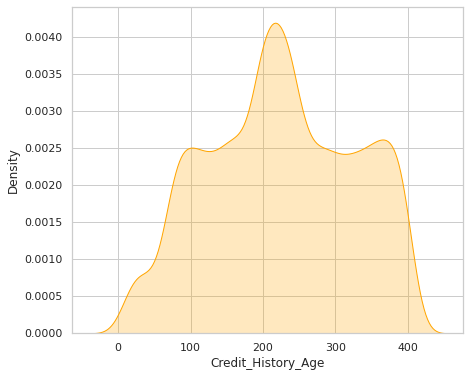

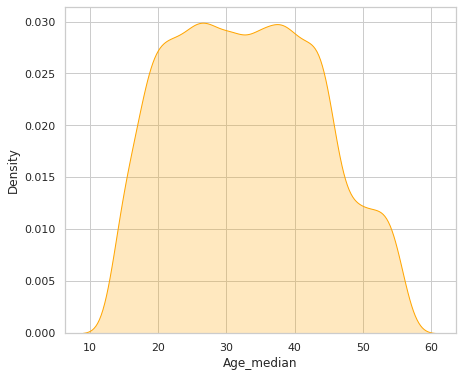

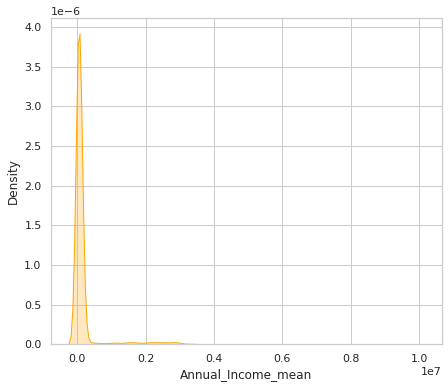

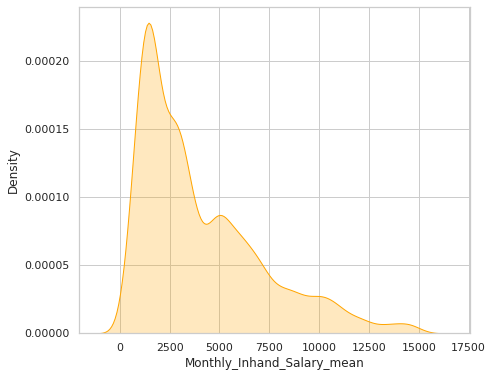

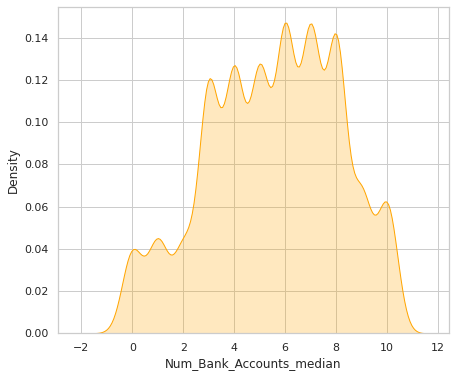

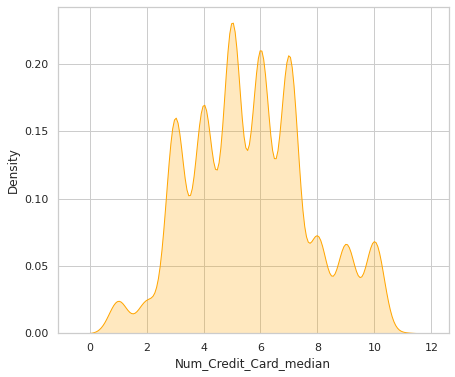

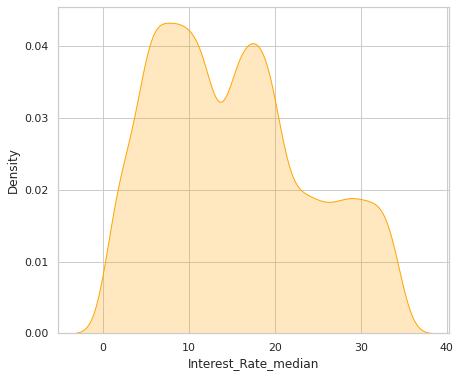

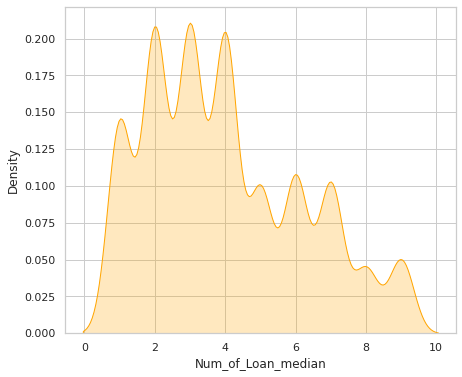

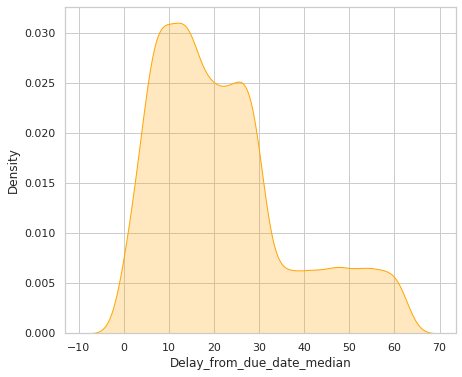

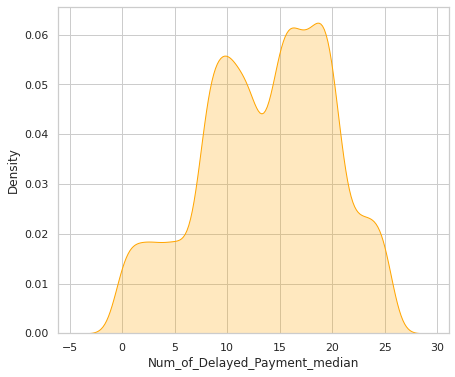

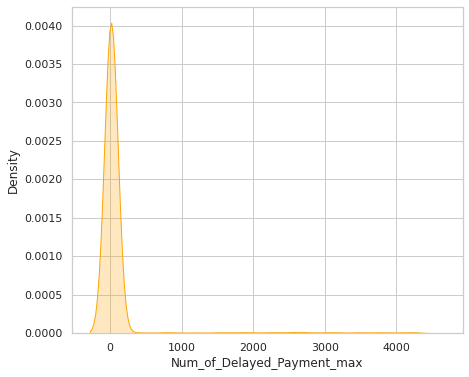

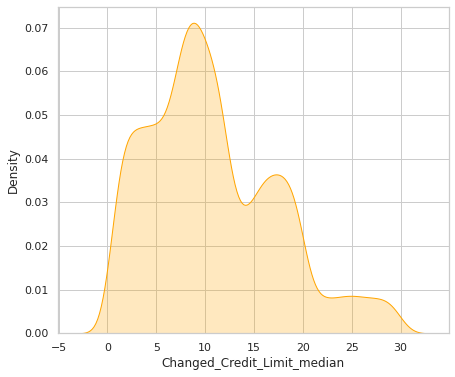

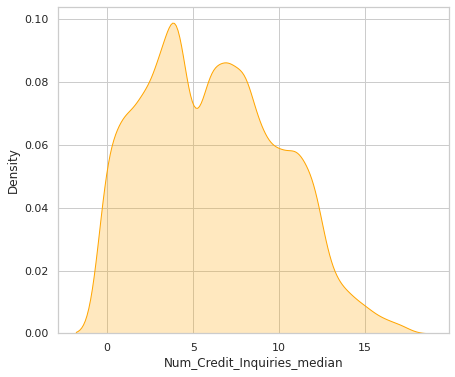

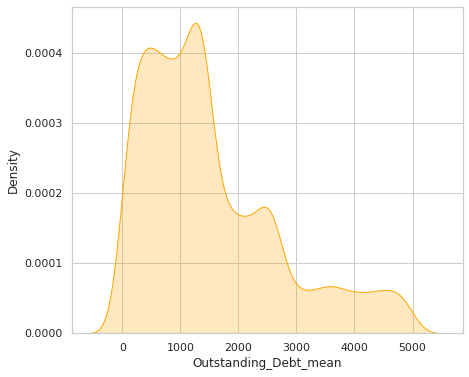

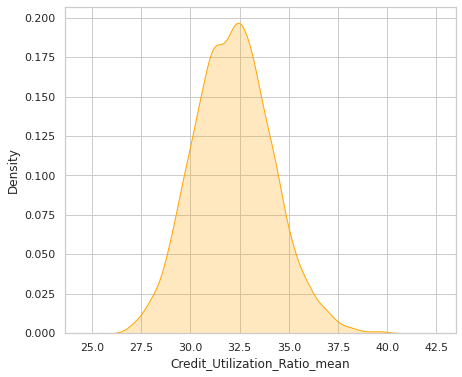

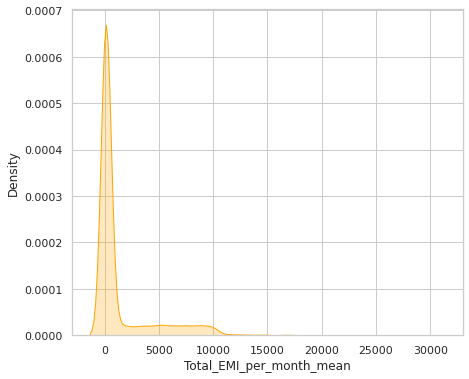

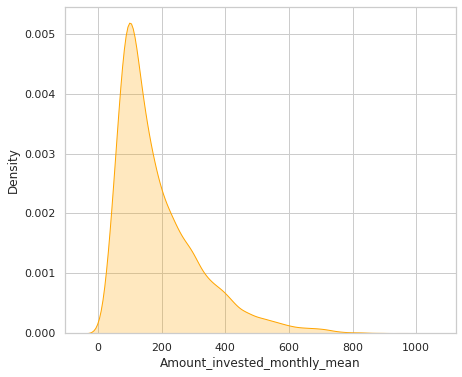

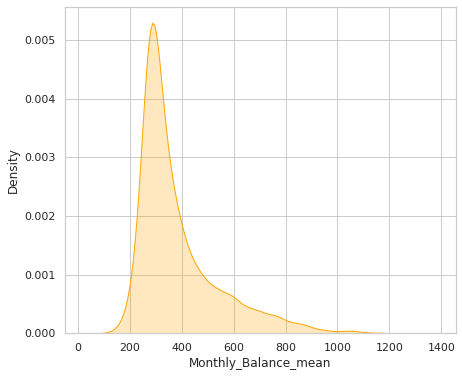

In [259]:
kde_plot(X_features = extracted_features, columns = columns_for_plot)

In [260]:
def hist_plot(X_features, columns):
  
    for col in columns:

        plt.figure(figsize=(7,6))

        sns.histplot(X_features[col], kde=True, color='purple')
        
        plt.show()

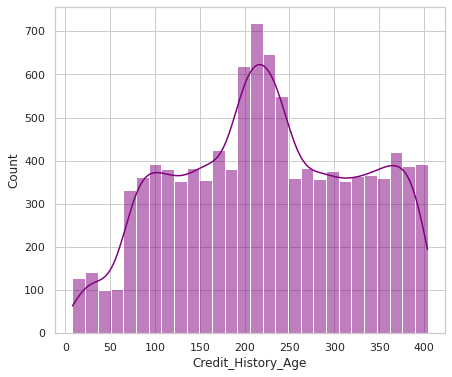

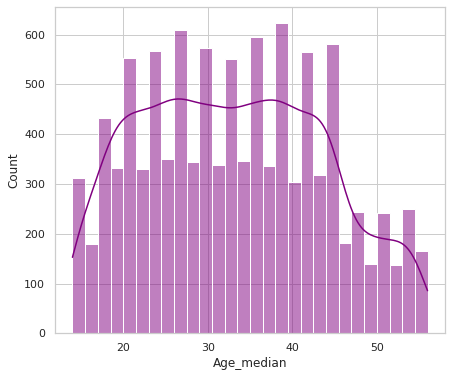

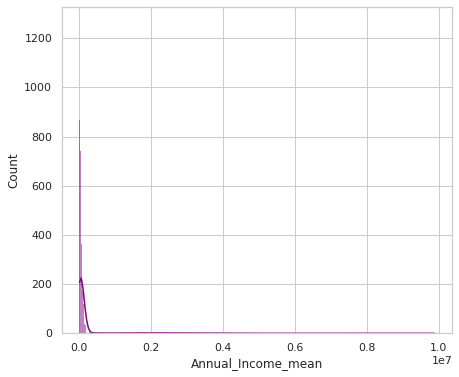

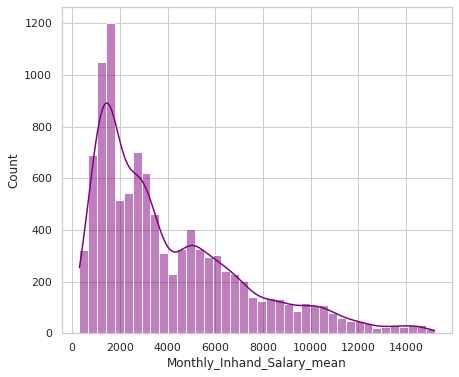

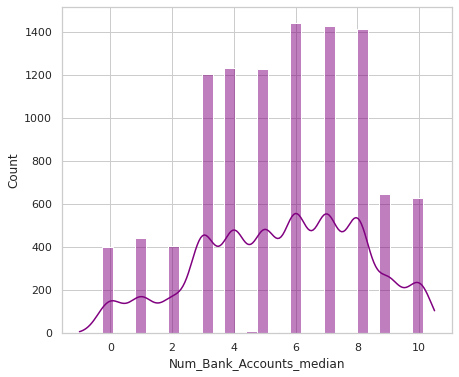

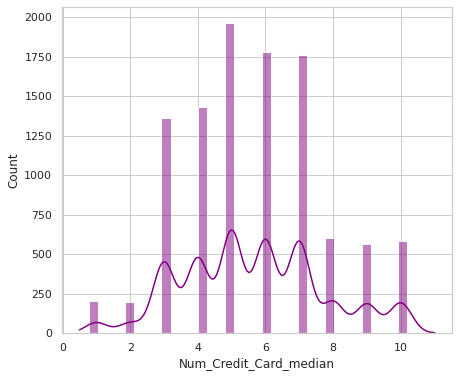

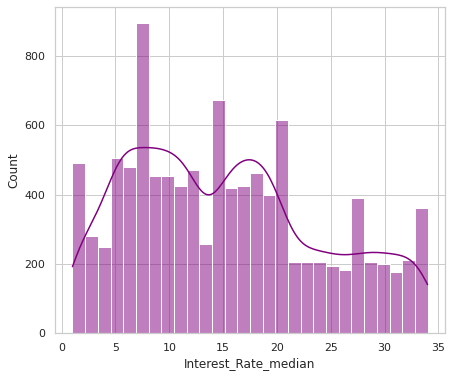

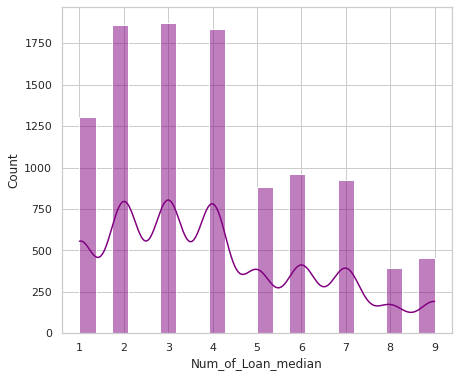

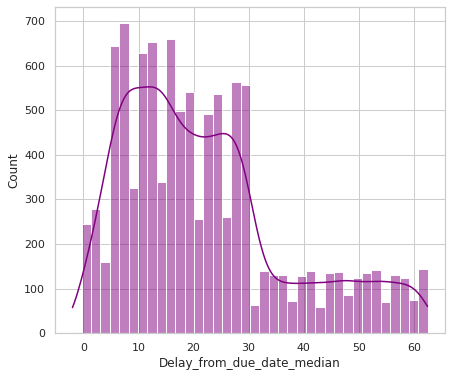

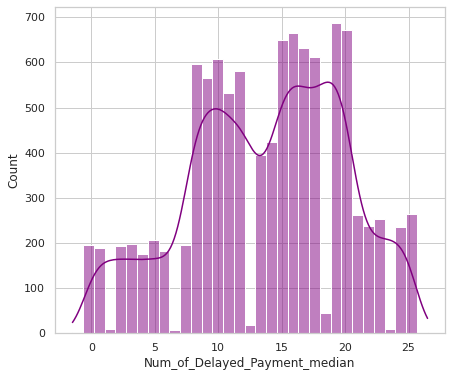

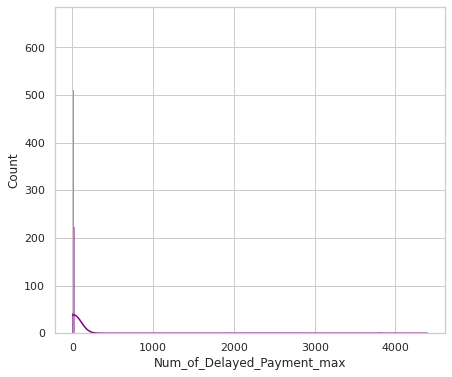

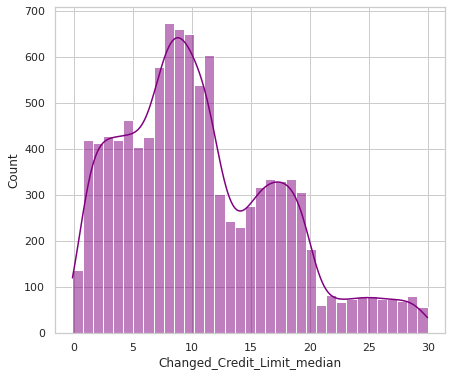

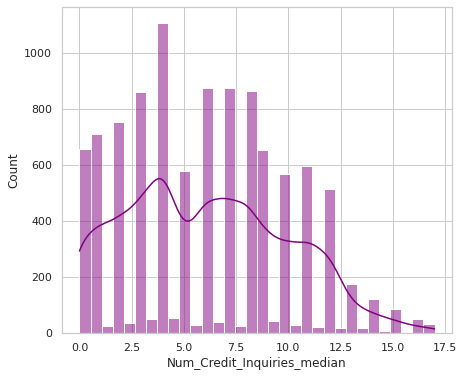

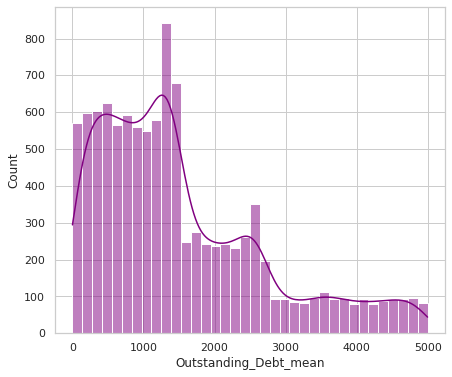

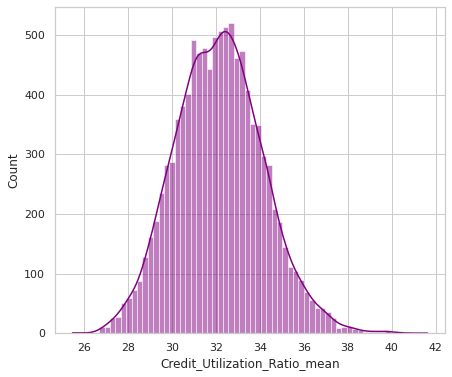

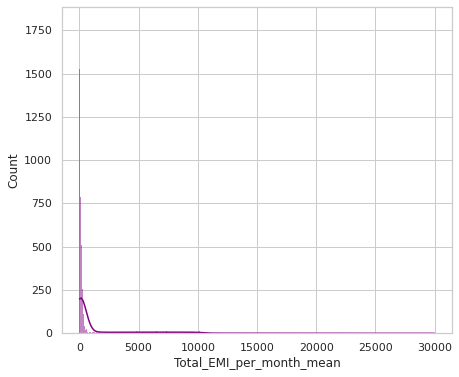

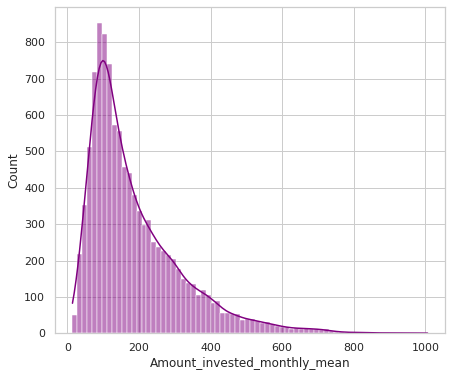

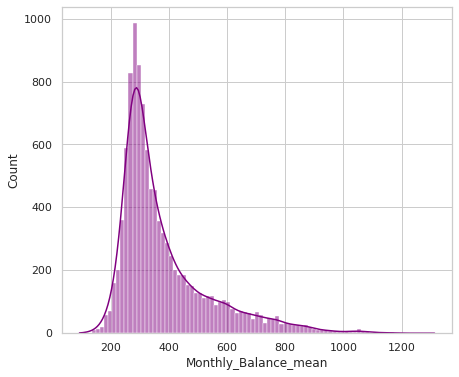

In [261]:
hist_plot(X_features = extracted_features, columns = columns_for_plot)



## Q-Q - plot



In [276]:
import scipy.stats as stats
import pylab 

In [277]:
def QQ_plot(X_features, columns):

    for col in columns:

        plt.figure(figsize=(7,6))

        stats.probplot(X_features[col], dist="norm", plot=pylab)

        pylab.show()

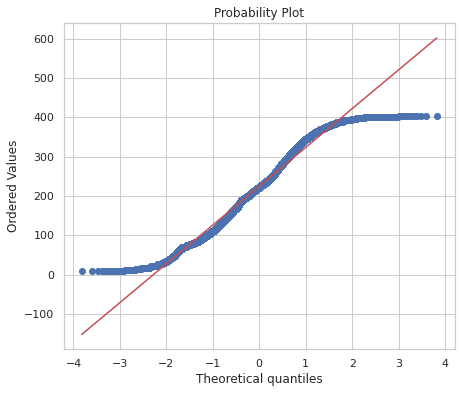

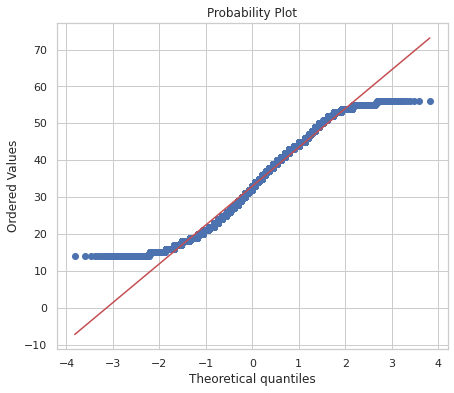

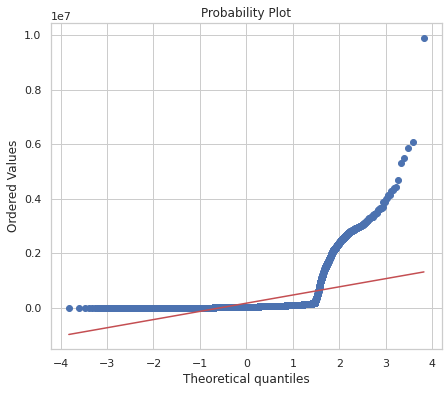

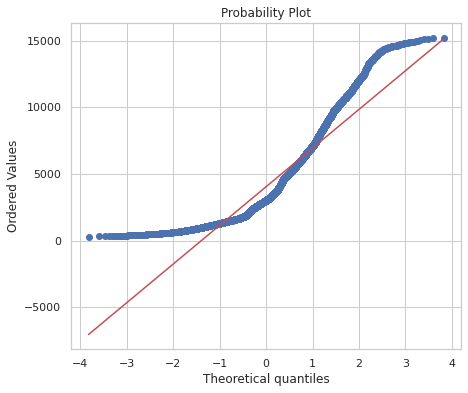

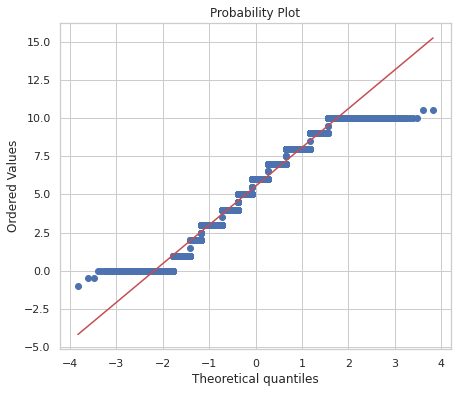

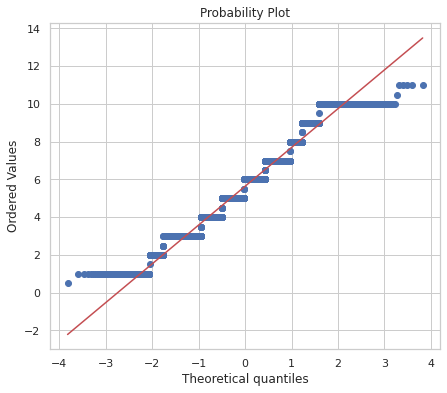

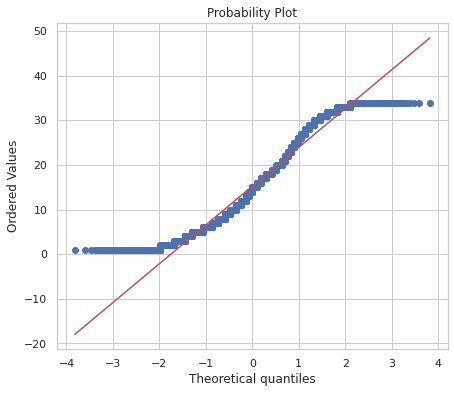

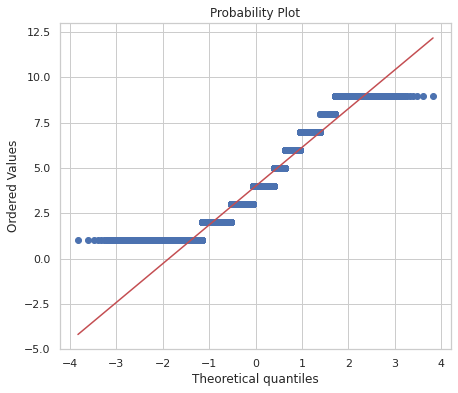

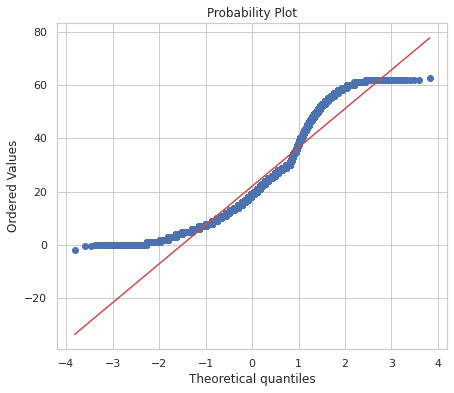

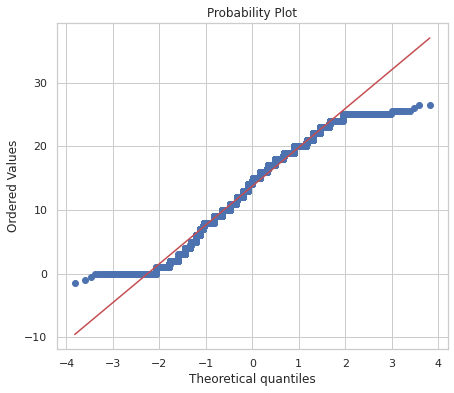

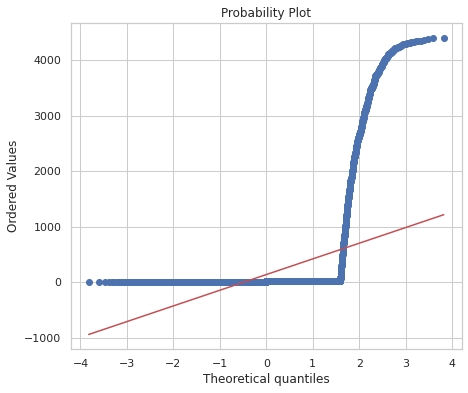

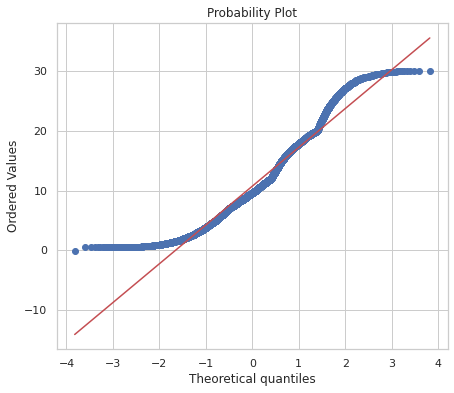

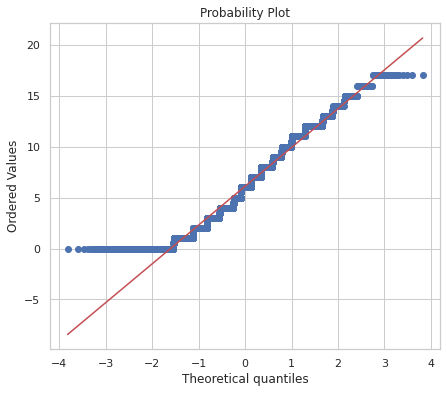

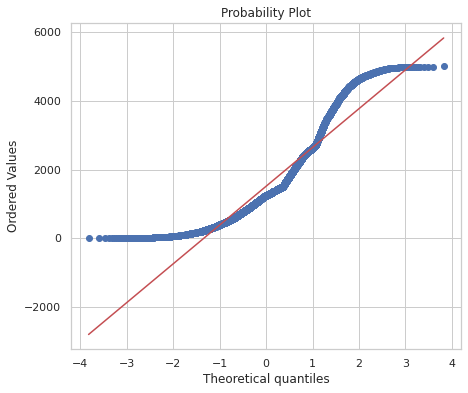

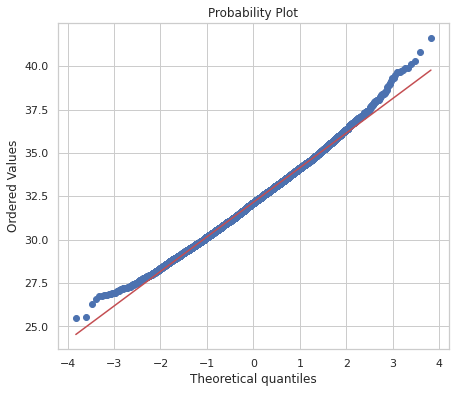

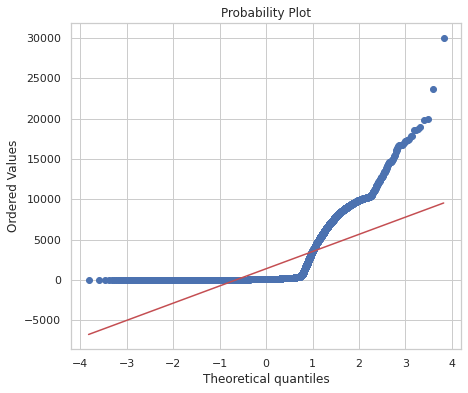

In [278]:
QQ_plot(X_features = extracted_features, columns = columns_for_plot)



> Test D'Agostino



In [282]:
statistics, pvalues = stats.normaltest(extracted_features.select_dtypes(include='float64'))


In [266]:
alpha = 0.05

## Correlation

In [285]:
def corr_heatmap(data):

    plt.figure(figsize=(15,12))

    sns.heatmap(round(data.corr(),3), annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.6)

    plt.show()

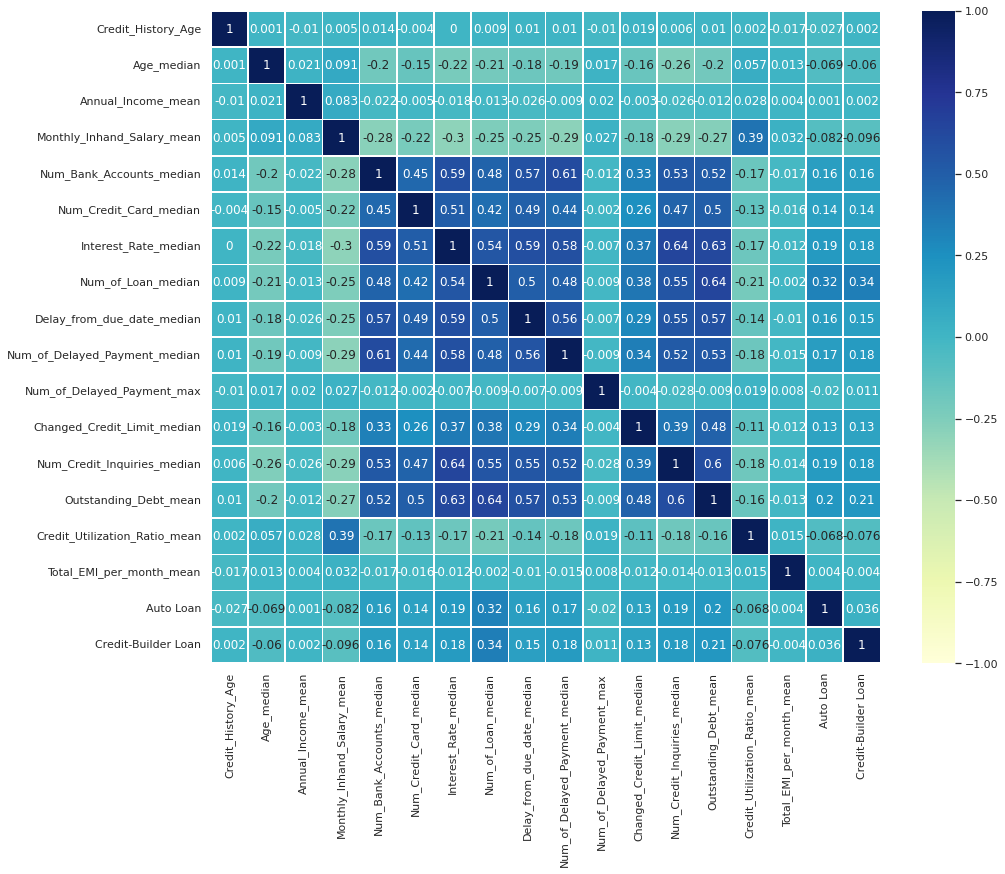

In [286]:
corr_heatmap(data = extracted_features.iloc[:, 0: 19])



> Большая корреляция(>0.85) между следующими признаками:



*   **Monthly_Inhand_Salary_mean --> Amount_invested_monthly_mean**
*   **Monthly_Inhand_Salary_mean --> Monthly_Balance_mean** 







> Решение: удалить столбцы Amount_invested_monthly_mean и Monthly_Balance_mean из признакового пространства



In [269]:
extracted_features.drop(columns=['Amount_invested_monthly_mean','Monthly_Balance_mean'], axis = 1, inplace=True)

In [270]:
extracted_features.shape

(10500, 47)

In [271]:
columns_for_plot = extracted_features.iloc[:, : 16].columns

## Outliers Check

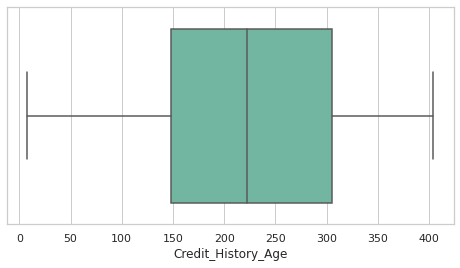

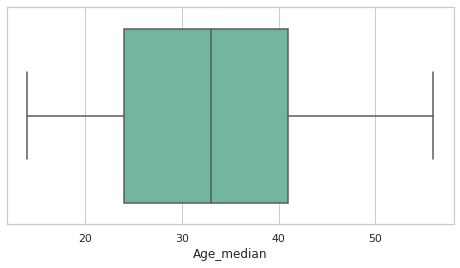

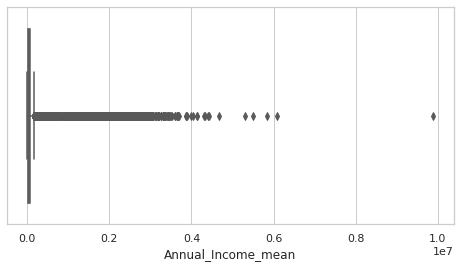

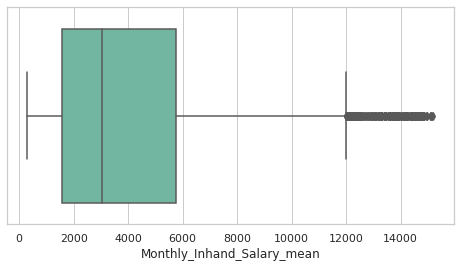

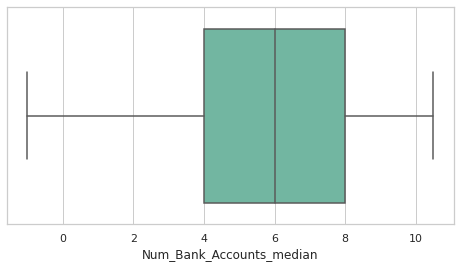

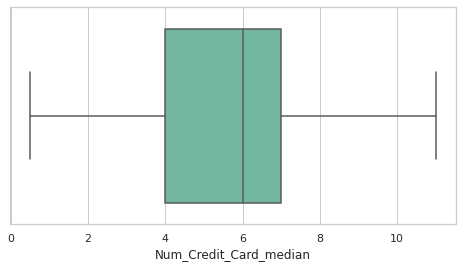

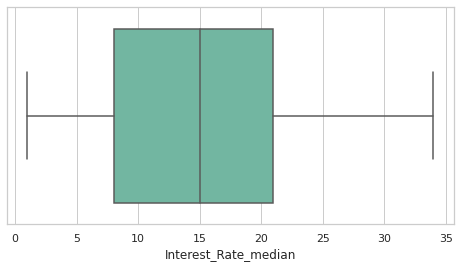

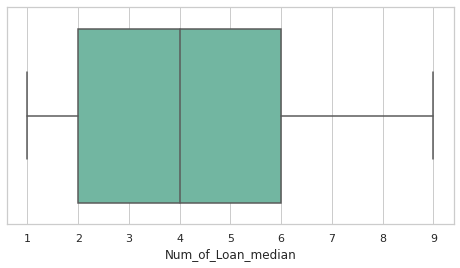

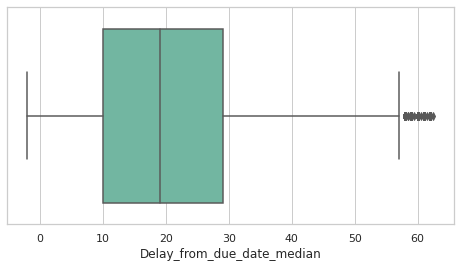

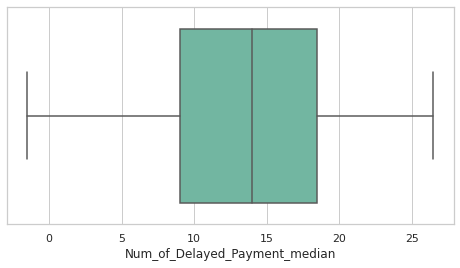

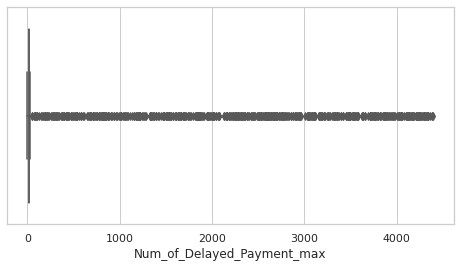

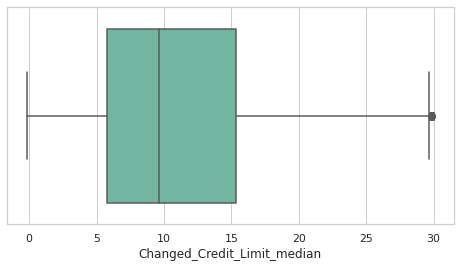

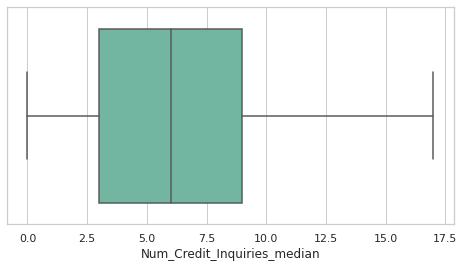

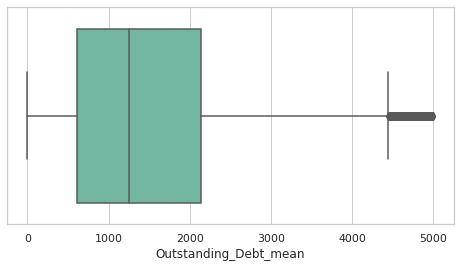

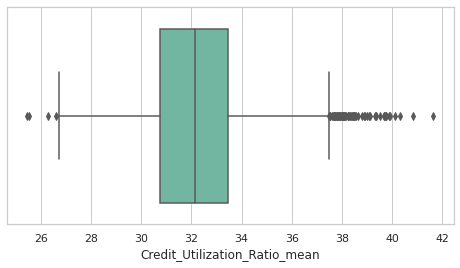

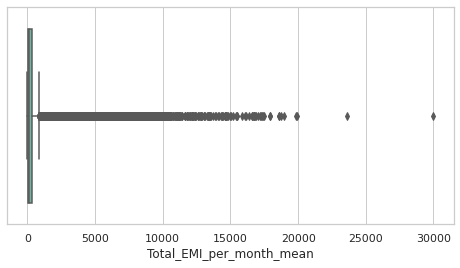

In [272]:
# sns.boxplot(x=columns_for_plot, data=extracted_features)
sns.set(style="whitegrid")

for col in columns_for_plot:

    plt.figure(figsize=(8,4))

    sns.boxplot(x=extracted_features[col], orient='h', palette='Set2')

    plt.show()

In [273]:
# for col in columns_for_plot:
  
#     q1, q3 = np.percentile(extracted_features[col], [25,75])
#     IQR = q3 - q1

#     high_border = q3 + (1.5*IQR)
#     low_border = q1 - (1.5*IQR)

#     extracted_features.loc[(extracted_features[col] < low_border)|(extracted_features[col] > high_border), col] = np.nan

# extracted_features.dropna(inplace=True)
# extracted_features.reset_index(drop=True, inplace=True)



> Удалим выбросы, используя Z-оценку: $Z = \frac{X-\mu}{\sigma}$






In [288]:
z_score = np.abs(stats.zscore(extracted_features[columns_for_plot]))

clean_features = extracted_features[(z_score < 3).all(axis=1)]

clean_features.reset_index(drop=True, inplace=True)


In [289]:
clean_features.shape

(9467, 47)

# Train - test splitting

In [290]:
X_train, X_test, y_train, y_test = train_test_split(clean_features.drop(columns=['Credit_Score_mode']), 
                                                    clean_features.Credit_Score_mode, 
                                                    test_size = 0.25, 
                                                    random_state = 23)

In [291]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7100 entries, 4933 to 8787
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Credit_History_Age             7100 non-null   float64
 1   Age_median                     7100 non-null   float64
 2   Annual_Income_mean             7100 non-null   float64
 3   Monthly_Inhand_Salary_mean     7100 non-null   float64
 4   Num_Bank_Accounts_median       7100 non-null   float64
 5   Num_Credit_Card_median         7100 non-null   float64
 6   Interest_Rate_median           7100 non-null   float64
 7   Num_of_Loan_median             7100 non-null   float64
 8   Delay_from_due_date_median     7100 non-null   float64
 9   Num_of_Delayed_Payment_median  7100 non-null   float64
 10  Num_of_Delayed_Payment_max     7100 non-null   float64
 11  Changed_Credit_Limit_median    7100 non-null   float64
 12  Num_Credit_Inquiries_median    7100 non-null 

In [292]:
y_train.value_counts()

Standard    3435
Poor        2494
Good        1171
Name: Credit_Score_mode, dtype: int64

# Standardization

In [293]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Q-Q plot after Scaling

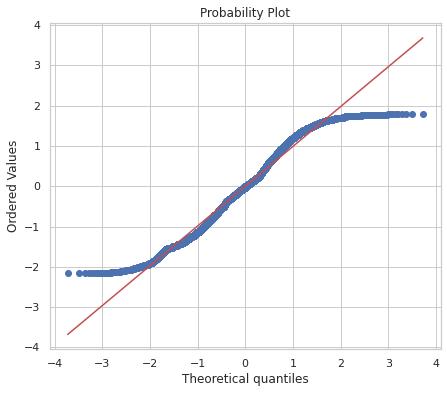

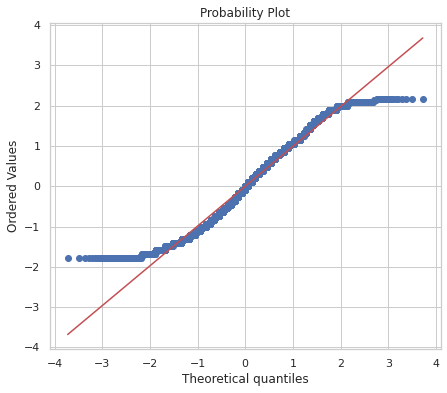

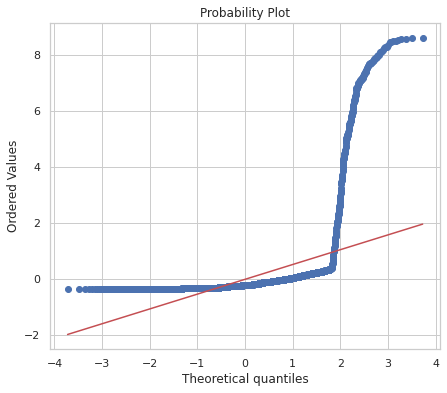

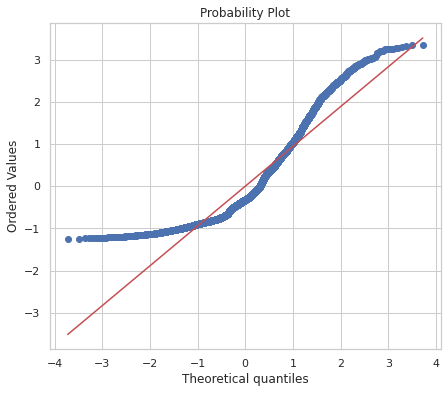

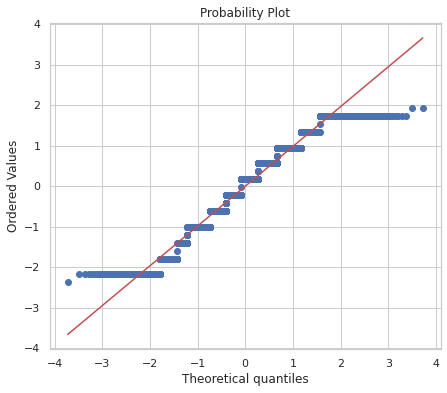

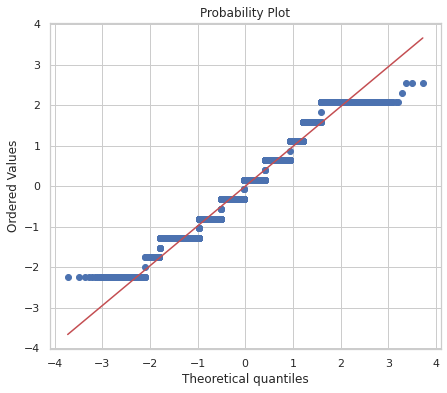

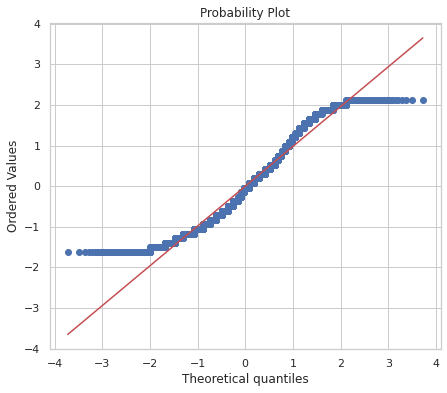

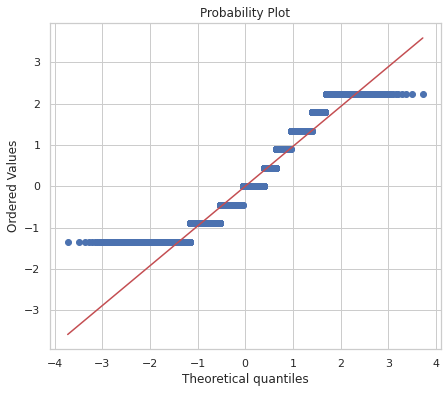

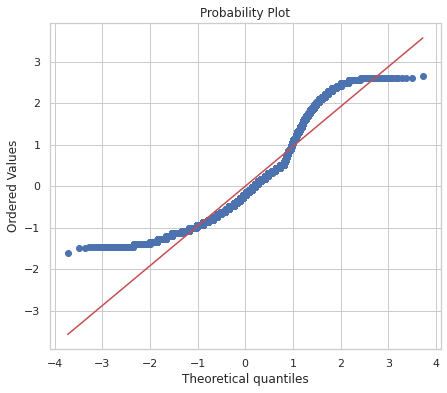

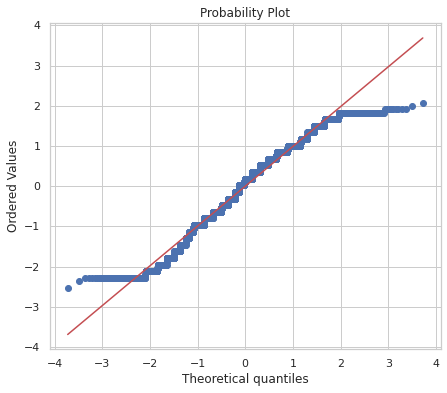

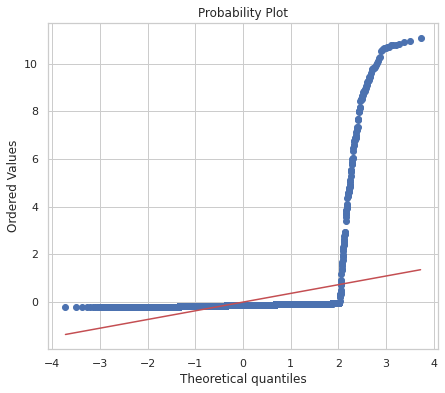

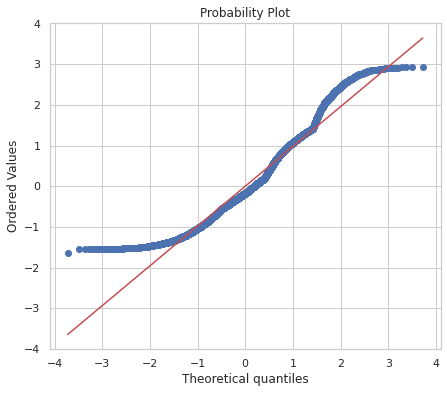

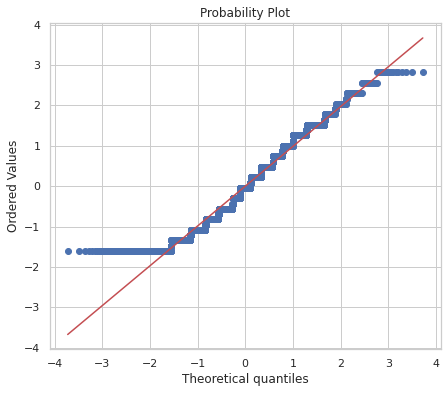

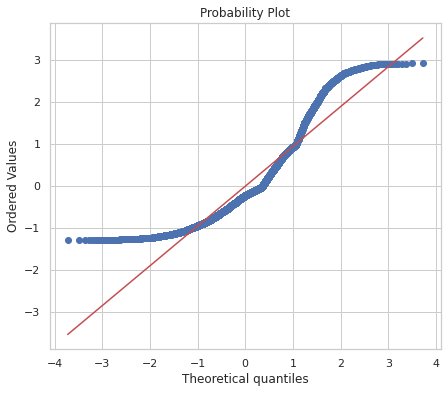

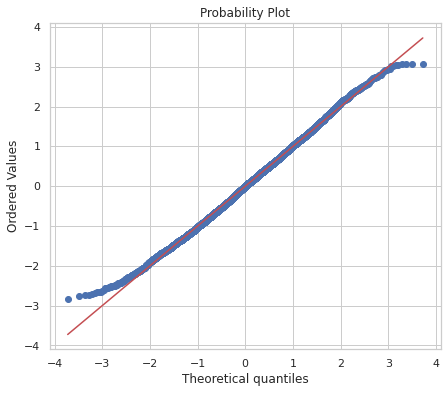

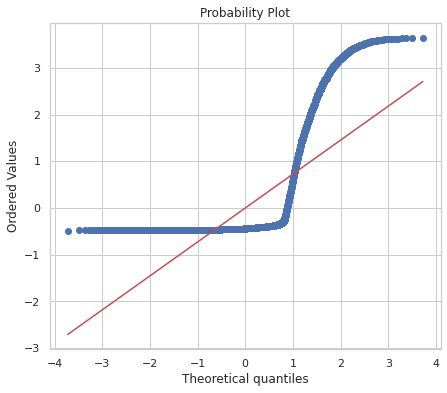

In [294]:
for col in range(len(columns_for_plot)):

    plt.figure(figsize=(7,6))

    stats.probplot(X_train_scaled[:, col], dist="norm", plot=pylab)

    pylab.show()

In [295]:
# QQ_plot(X_features = X_train_scaled, columns = columns_for_plot)

# PCA

In [296]:
pca = PCA(n_components = X_train_scaled.shape[1])
pca_data = pca.fit_transform(X_train_scaled)

percent_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cumsum_var_explained = np.cumsum(percent_var_explained)

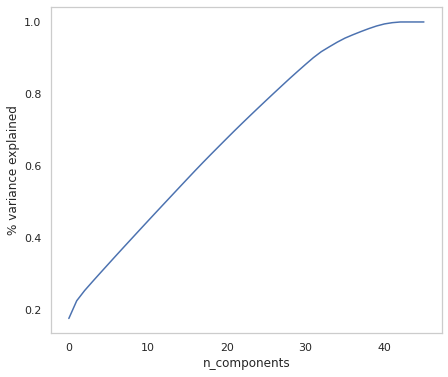

In [297]:
plt.figure(figsize=(7,6))

plt.plot(cumsum_var_explained, )

plt.grid()
plt.xlabel('n_components')
plt.ylabel('% variance explained')

plt.show()

In [298]:
cumsum_var_explained

array([0.17720673, 0.22636338, 0.25465639, 0.27949302, 0.30386531,
       0.328013  , 0.3521287 , 0.37603281, 0.39977772, 0.42350109,
       0.44711952, 0.47068722, 0.49410408, 0.51747431, 0.54082309,
       0.56413316, 0.58729631, 0.61008116, 0.6324498 , 0.65449593,
       0.67645863, 0.69823822, 0.71959405, 0.74067928, 0.76155616,
       0.78225178, 0.80278734, 0.82312587, 0.84335048, 0.86296801,
       0.88229997, 0.90114386, 0.91769637, 0.93094205, 0.94378626,
       0.95523631, 0.96451942, 0.97320232, 0.98146366, 0.9888259 ,
       0.99456677, 0.99805372, 0.99995839, 1.        , 1.        ,
       1.        ])

In [299]:
sum(pca.explained_variance_ratio_)

1.0

In [300]:
# pca = PCA(n_components=43)

# X_train_scaled_pca = pca.fit_transform(X_train_scaled)
# X_test_scaled_pca = pca.transform(X_test_scaled)

# CatBoostClassifier



In [301]:
results = pd.DataFrame()

model_result = {}




*   CatBoostClassifier







In [302]:
cat = CatBoostClassifier(depth = 6, 
                         l2_leaf_reg = 3,
                         iterations = 150, 
                         learning_rate = 0.1)

In [303]:
# params = {'learning_rate': [0.03, 0.1],
#           'depth': [4, 6, 10],
#           'l2_leaf_reg': [1, 3, 5,],
#           'iterations': [50, 100, 150]}

# model.grid_search(param_grid = params, X = X_train_scaled_pca, y = y_train)

# model.get_params()

In [304]:
cat.fit(X_train_scaled, y_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0188443	total: 62.5ms	remaining: 9.3s
1:	learn: 0.9504165	total: 74.6ms	remaining: 5.52s
2:	learn: 0.8936833	total: 86.6ms	remaining: 4.24s
3:	learn: 0.8455509	total: 98.1ms	remaining: 3.58s
4:	learn: 0.8082157	total: 110ms	remaining: 3.2s
5:	learn: 0.7734849	total: 122ms	remaining: 2.93s
6:	learn: 0.7437606	total: 134ms	remaining: 2.74s
7:	learn: 0.7183846	total: 146ms	remaining: 2.6s
8:	learn: 0.6966947	total: 158ms	remaining: 2.48s
9:	learn: 0.6791034	total: 171ms	remaining: 2.39s
10:	learn: 0.6643660	total: 183ms	remaining: 2.32s
11:	learn: 0.6481956	total: 204ms	remaining: 2.35s
12:	learn: 0.6355720	total: 217ms	remaining: 2.29s
13:	learn: 0.6241384	total: 235ms	remaining: 2.28s
14:	learn: 0.6131336	total: 252ms	remaining: 2.27s
15:	learn: 0.6063278	total: 273ms	remaining: 2.28s
16:	learn: 0.5992018	total: 285ms	remaining: 2.23s
17:	learn: 0.5925182	total: 298ms	remaining: 2.18s
18:	learn: 0.5862785	total: 310ms	remaining: 2.14s
19:	learn: 0.5812236	total: 324ms	remain

In [305]:
cat_y_pred = cat.predict(X_test_scaled)

In [306]:
cat_probs = cat.predict_proba(X_test_scaled)



> CatBoostClassifier Results Visualization





*   Values of metrics



In [307]:
print(classification_report(y_test, cat_y_pred))

              precision    recall  f1-score   support

        Good       0.63      0.84      0.72       386
        Poor       0.82      0.78      0.80       828
    Standard       0.83      0.76      0.79      1153

    accuracy                           0.78      2367
   macro avg       0.76      0.79      0.77      2367
weighted avg       0.79      0.78      0.78      2367





*   Feature Importance



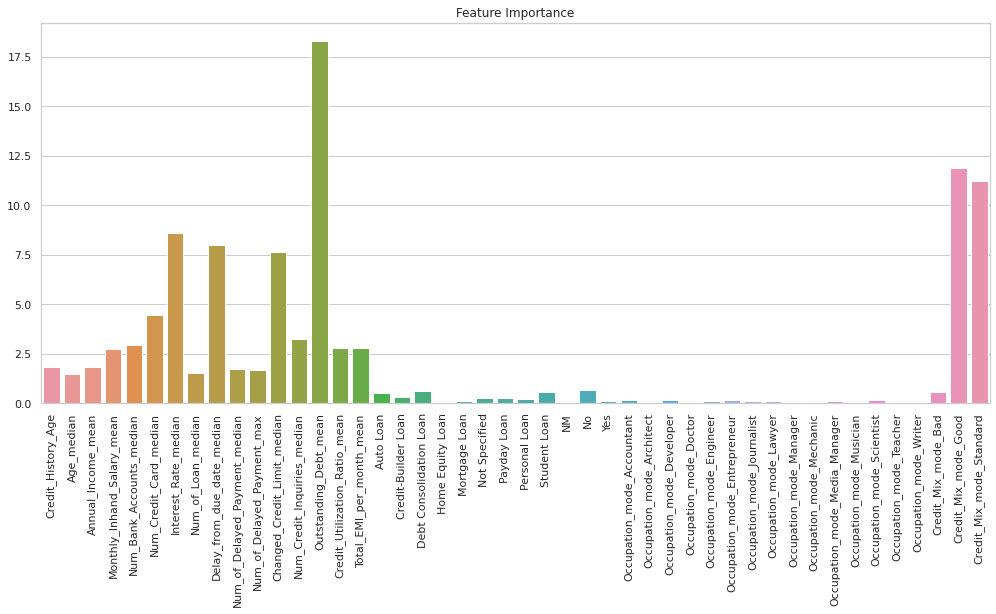

In [308]:
plt.figure(figsize = (17, 7))

ax = sns.barplot(y = cat.get_feature_importance(), x = X_train.columns, orient = 'v')

ax.set_title('Feature Importance')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.show()



*   Confusion Matrix



In [309]:
cm = confusion_matrix(y_true = y_test, y_pred = cat_y_pred, labels=cat.classes_)

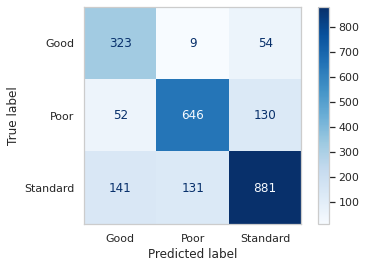

In [310]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_true = y_test, y_pred = cat_y_pred), display_labels=cat.classes_)

cmd.plot(cmap = 'Blues')

plt.grid()

plt.show()

*   ROC-AUC 

In [339]:
label_binarizer = LabelBinarizer().fit(y_train)
y_test_onehot = label_binarizer.transform(y_test)
y_score_onehot = label_binarizer.transform(cat_y_pred)

In [379]:
def get_target_names():
    num_classes = 3
    target_names = [None]*num_classes

    for class_ in y_train.unique():
        index = label_binarizer.transform([class_]).flatten().tolist().index(1)
        target_names[index] = class_
    return target_names


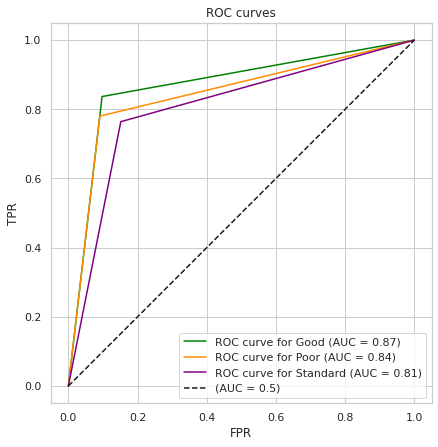

In [381]:
def plot_roc_curves(target_names):
    fig, ax = plt.subplots(figsize=(15, 7))

    colors = ["green", "darkorange", "purple"]

    for class_id, color in zip(range(3), colors):

        RocCurveDisplay.from_predictions(
            y_test_onehot[:, class_id],
            y_score_onehot[:, class_id],
            name=f"ROC curve for {target_names[class_id]}",
            color=color,
            ax=ax,
        )

    plt.plot([0, 1], [0, 1], 'k--', label = "(AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC curves")
    plt.legend()

    plt.show()

plot_roc_curves(target_names = get_target_names())



*   ROC-AUC score



In [344]:
micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score_onehot,
    multi_class="ovr",
    average="weighted"
)

print('Micro-averaged One-vs-Rest ROC AUC score: {:.2f}'.format(micro_roc_auc_ovr))

Micro-averaged One-vs-Rest ROC AUC score: 0.83
